In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D
import seaborn as sns

In [3]:
path="~/OneDrive/python/datathon/energy/"
data=pd.read_csv(path+"train.csv", encoding="utf-8")
data

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0,0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0,0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0,0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0,0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19,4114.368,27.8,2.3,68.0,0.0,0.7,1,1
122396,60,2020-08-24 20,3975.696,27.3,1.2,71.0,0.0,0.0,1,1
122397,60,2020-08-24 21,3572.208,27.3,1.8,71.0,0.0,0.0,1,1
122398,60,2020-08-24 22,3299.184,27.1,1.8,74.0,0.0,0.0,1,1


In [4]:
data["date_time"]=pd.to_datetime(data["date_time"])
data

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0,0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0,0
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0,0
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0,0
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.368,27.8,2.3,68.0,0.0,0.7,1,1
122396,60,2020-08-24 20:00:00,3975.696,27.3,1.2,71.0,0.0,0.0,1,1
122397,60,2020-08-24 21:00:00,3572.208,27.3,1.8,71.0,0.0,0.0,1,1
122398,60,2020-08-24 22:00:00,3299.184,27.1,1.8,74.0,0.0,0.0,1,1


In [5]:
data.describe()

,num,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
count,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000
mean,30.500000,2324.830866,24.251713,2.151641,80.169848,0.514989,0.213533,0.683333,0.483333
std,17.318173,2058.999326,3.407902,1.514475,15.525862,2.624505,0.370517,0.465178,0.499724
min,1.000000,0.000000,11.100000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,15.750000,1055.268000,21.800000,1.100000,70.000000,0.000000,0.000000,0.000000,0.000000
50%,30.500000,1700.352000,24.200000,1.900000,84.000000,0.000000,0.000000,1.000000,0.000000
75%,45.250000,2780.487000,26.500000,2.900000,93.000000,0.000000,0.300000,1.000000,1.000000
max,60.000000,17739.225000,36.300000,20.100000,100.000000,81.500000,1.000000,1.000000,1.000000


In [6]:
data.isnull().sum()

num           0
date_time     0
전력사용량(kWh)    0
기온(°C)        0
풍속(m/s)       0
습도(%)         0
강수량(mm)       0
일조(hr)        0
비전기냉방설비운영     0
태양광보유         0
dtype: int64

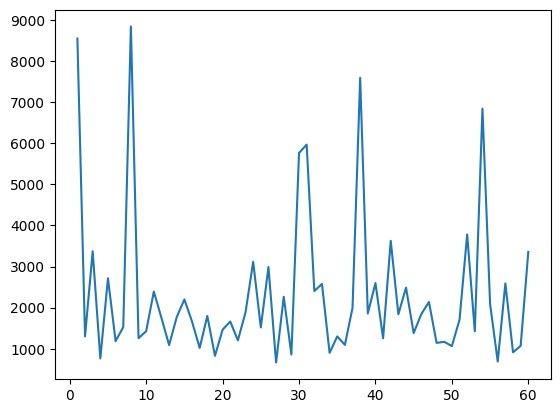

In [7]:
plt.plot(data.groupby('num')['전력사용량(kWh)'].mean())

체감온도(℃) = 13.12 + 0.6215 × 기온 - 11.37 × 바람속도^0.16 + 0.3965 × 기온 × 바람속도^0.16

불쾌지수=1.8x기온–0.55x(1–습도)x(1.8x기온–26)+32  

|불쾌지수|℃|불쾌를느끼는 정도|
|---|---|---|
|68 이하|20 이하|전원 쾌적|
|70|21|불쾌를 나타냄|
|75|24|10% 정도 불쾌|
|80|26.5|50% 정도 불쾌|
|83|28.5|전원 불쾌|
|86|30.0|매우 불쾌|

In [8]:
data["체감온도"]=13.12 + 0.6215 * data["기온(°C)"] - 11.37 * data["풍속(m/s)"]**0.16 + 0.3965 * data["기온(°C)"] * data["풍속(m/s)"]**0.16
data["불쾌지수"]=1.8*data["기온(°C)"]-0.55*(1-data["습도(%)"]/100)*(1.8*data["기온(°C)"]-26)+32  

data

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,체감온도,불쾌지수
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0,0,18.973374,63.43008
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0,0,18.960338,63.56993
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0,0,18.658598,63.22775
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0,0,18.218957,62.54339
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0,0,18.081523,62.39760
...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.368,27.8,2.3,68.0,0.0,0.7,1,1,30.000891,77.80896
122396,60,2020-08-24 20:00:00,3975.696,27.3,1.2,71.0,0.0,0.0,1,1,29.525251,77.44917
122397,60,2020-08-24 21:00:00,3572.208,27.3,1.8,71.0,0.0,0.0,1,1,29.487603,77.44917
122398,60,2020-08-24 22:00:00,3299.184,27.1,1.8,74.0,0.0,0.0,1,1,29.276183,77.52246


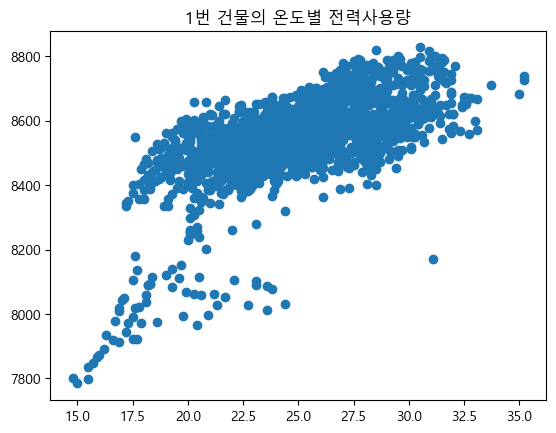

In [9]:
matplotlib.rc('font', family="Malgun Gothic")
plt.title("1번 건물의 온도별 전력사용량")
plt.scatter(data[data["num"]==1]["기온(°C)"],data[data["num"]==1]["전력사용량(kWh)"])
plt.show()

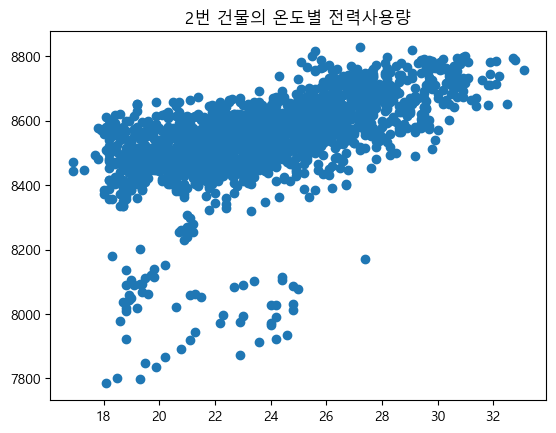

In [10]:
matplotlib.rc('font', family="Malgun Gothic")
plt.title("2번 건물의 온도별 전력사용량")
plt.scatter(data[data["num"]==2]["기온(°C)"],data[data["num"]==1]["전력사용량(kWh)"])
plt.show()

|불쾌지수|℃|불쾌를느끼는 정도|분류|
|---|---|---|---|
|68 이하|20 이하|전원 쾌적|0|
|70|21|불쾌를 나타냄|1|
|75|24|10% 정도 불쾌|2|
|80|26.5|50% 정도 불쾌|3|
|83|28.5|전원 불쾌|4|
|86|30.0|매우 불쾌|5|

In [11]:
for i in range(len(data)):
    if data.loc[i,'기온(°C)'] <= 20 and data.loc[i,'불쾌지수']<=68:
        data.loc[i,"불쾌도"]=0
    elif data.loc[i,'기온(°C)'] <= 21 and data.loc[i,'불쾌지수']<=70:
        data.loc[i,"불쾌도"]=1
    elif data.loc[i,'기온(°C)'] <= 24 and data.loc[i,'불쾌지수']<=75:
        data.loc[i,"불쾌도"]=2
    elif data.loc[i,'기온(°C)'] <= 26.5 and data.loc[i,'불쾌지수']<=80:
        data.loc[i,"불쾌도"]=3
    elif data.loc[i,'기온(°C)'] <= 28.5 and data.loc[i,'불쾌지수']<=83:
        data.loc[i,"불쾌도"]=4
    else:
        data.loc[i,"불쾌도"]=5
        
data    

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,체감온도,불쾌지수,불쾌도
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0,0,18.973374,63.43008,0.0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0,0,18.960338,63.56993,0.0
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0,0,18.658598,63.22775,0.0
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0,0,18.218957,62.54339,0.0
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0,0,18.081523,62.39760,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.368,27.8,2.3,68.0,0.0,0.7,1,1,30.000891,77.80896,4.0
122396,60,2020-08-24 20:00:00,3975.696,27.3,1.2,71.0,0.0,0.0,1,1,29.525251,77.44917,4.0
122397,60,2020-08-24 21:00:00,3572.208,27.3,1.8,71.0,0.0,0.0,1,1,29.487603,77.44917,4.0
122398,60,2020-08-24 22:00:00,3299.184,27.1,1.8,74.0,0.0,0.0,1,1,29.276183,77.52246,4.0


불쾌도
0.0    1830.123821
1.0    1955.610599
2.0    2144.522280
3.0    2404.631213
4.0    2699.911634
5.0    2898.001841
Name: 전력사용량(kWh), dtype: float64


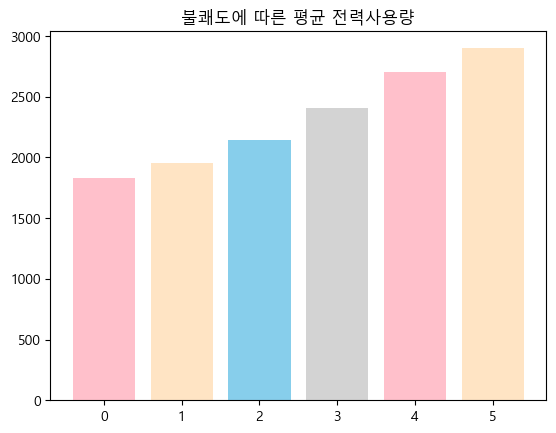

In [12]:
colors = ['pink','bisque','skyblue','lightgrey']
print(data.groupby('불쾌도')['전력사용량(kWh)'].mean())
matplotlib.rc('font', family="Malgun Gothic")
plt.bar([0,1,2,3,4,5],data.groupby('불쾌도')['전력사용량(kWh)'].mean(), color=colors)
plt.title("불쾌도에 따른 평균 전력사용량")
plt.show()

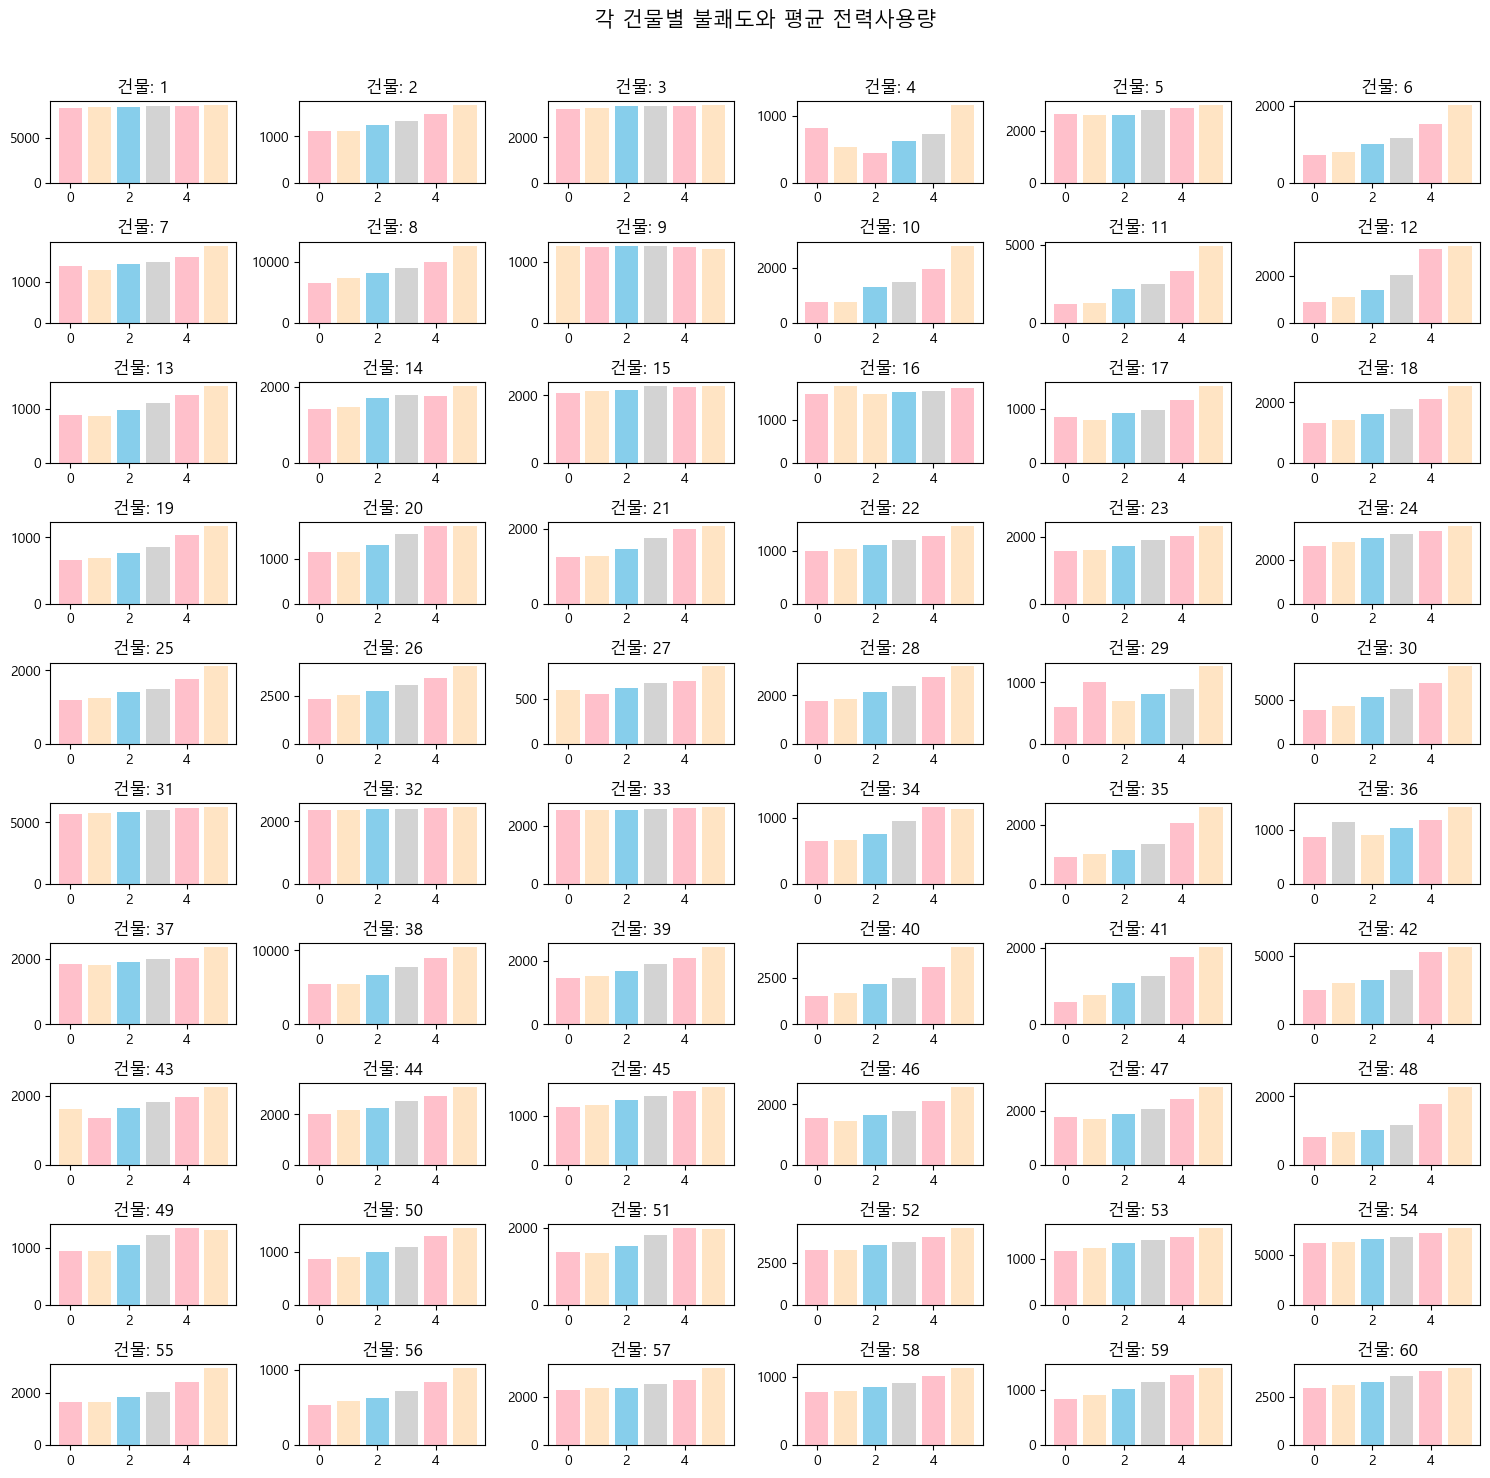

In [13]:
fig = plt.figure(figsize = (15 ,15))
matplotlib.rc('font', family="Malgun Gothic")
plt.title("각 건물별 불쾌도와 평균 전력사용량", fontsize=15, y=1.05)
plt.axis('off')


for num in range(1,61):
    df = data[data.num==num]
    df_counts = df.groupby('불쾌도')['전력사용량(kWh)'].mean()
    ax = fig.add_subplot(10,6,num)
    ax.bar(df['불쾌도'].unique(), df_counts, color=colors)
    ax.set_title(f'건물: {num}')

plt.tight_layout()
plt.show()

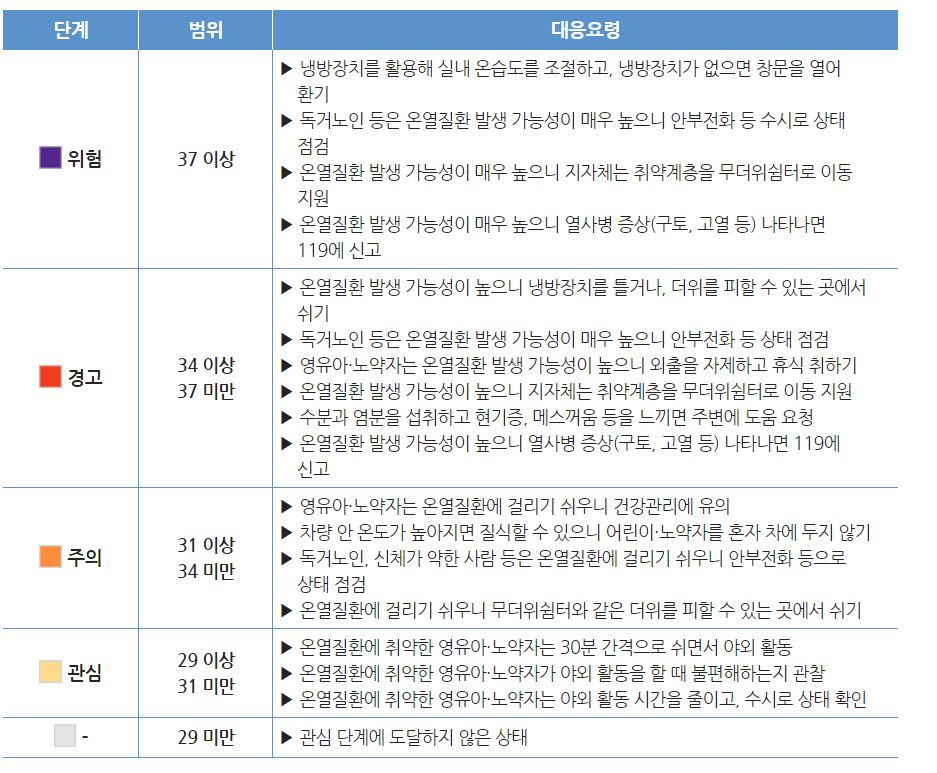

In [14]:
data.loc[data['체감온도']>=31, '체감온도단계']=4
data.loc[(data['체감온도']>=28)&(data['체감온도']<31), '체감온도단계']=3
data.loc[(data['체감온도']>=25)&(data['체감온도']<28), '체감온도단계']=2
data.loc[(data['체감온도']>=21)&(data['체감온도']<25), '체감온도단계']=1
data.loc[data['체감온도']<21, '체감온도단계']=0
data

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,체감온도,불쾌지수,불쾌도,체감온도단계
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0,0,18.973374,63.43008,0.0,0.0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0,0,18.960338,63.56993,0.0,0.0
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0,0,18.658598,63.22775,0.0,0.0
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0,0,18.218957,62.54339,0.0,0.0
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0,0,18.081523,62.39760,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.368,27.8,2.3,68.0,0.0,0.7,1,1,30.000891,77.80896,4.0,3.0
122396,60,2020-08-24 20:00:00,3975.696,27.3,1.2,71.0,0.0,0.0,1,1,29.525251,77.44917,4.0,3.0
122397,60,2020-08-24 21:00:00,3572.208,27.3,1.8,71.0,0.0,0.0,1,1,29.487603,77.44917,4.0,3.0
122398,60,2020-08-24 22:00:00,3299.184,27.1,1.8,74.0,0.0,0.0,1,1,29.276183,77.52246,4.0,3.0


체감온도단계
0.0    1863.961039
1.0    2036.604092
2.0    2307.104606
3.0    2623.297985
4.0    2896.438165
Name: 전력사용량(kWh), dtype: float64


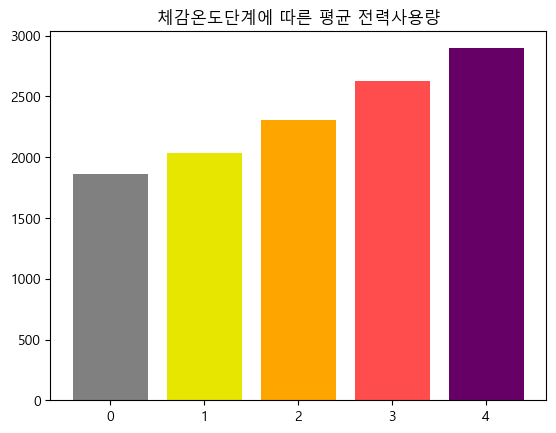

In [15]:
colors = ['grey',(0.9,0.9,0),'orange',(1, 0.3, 0.3),(0.4,0,0.4)]
print(data.groupby('체감온도단계')['전력사용량(kWh)'].mean())
matplotlib.rc('font', family="Malgun Gothic")
plt.title("체감온도단계에 따른 평균 전력사용량")
plt.bar([0,1,2,3,4],data.groupby('체감온도단계')['전력사용량(kWh)'].mean(), color=colors)
plt.show()

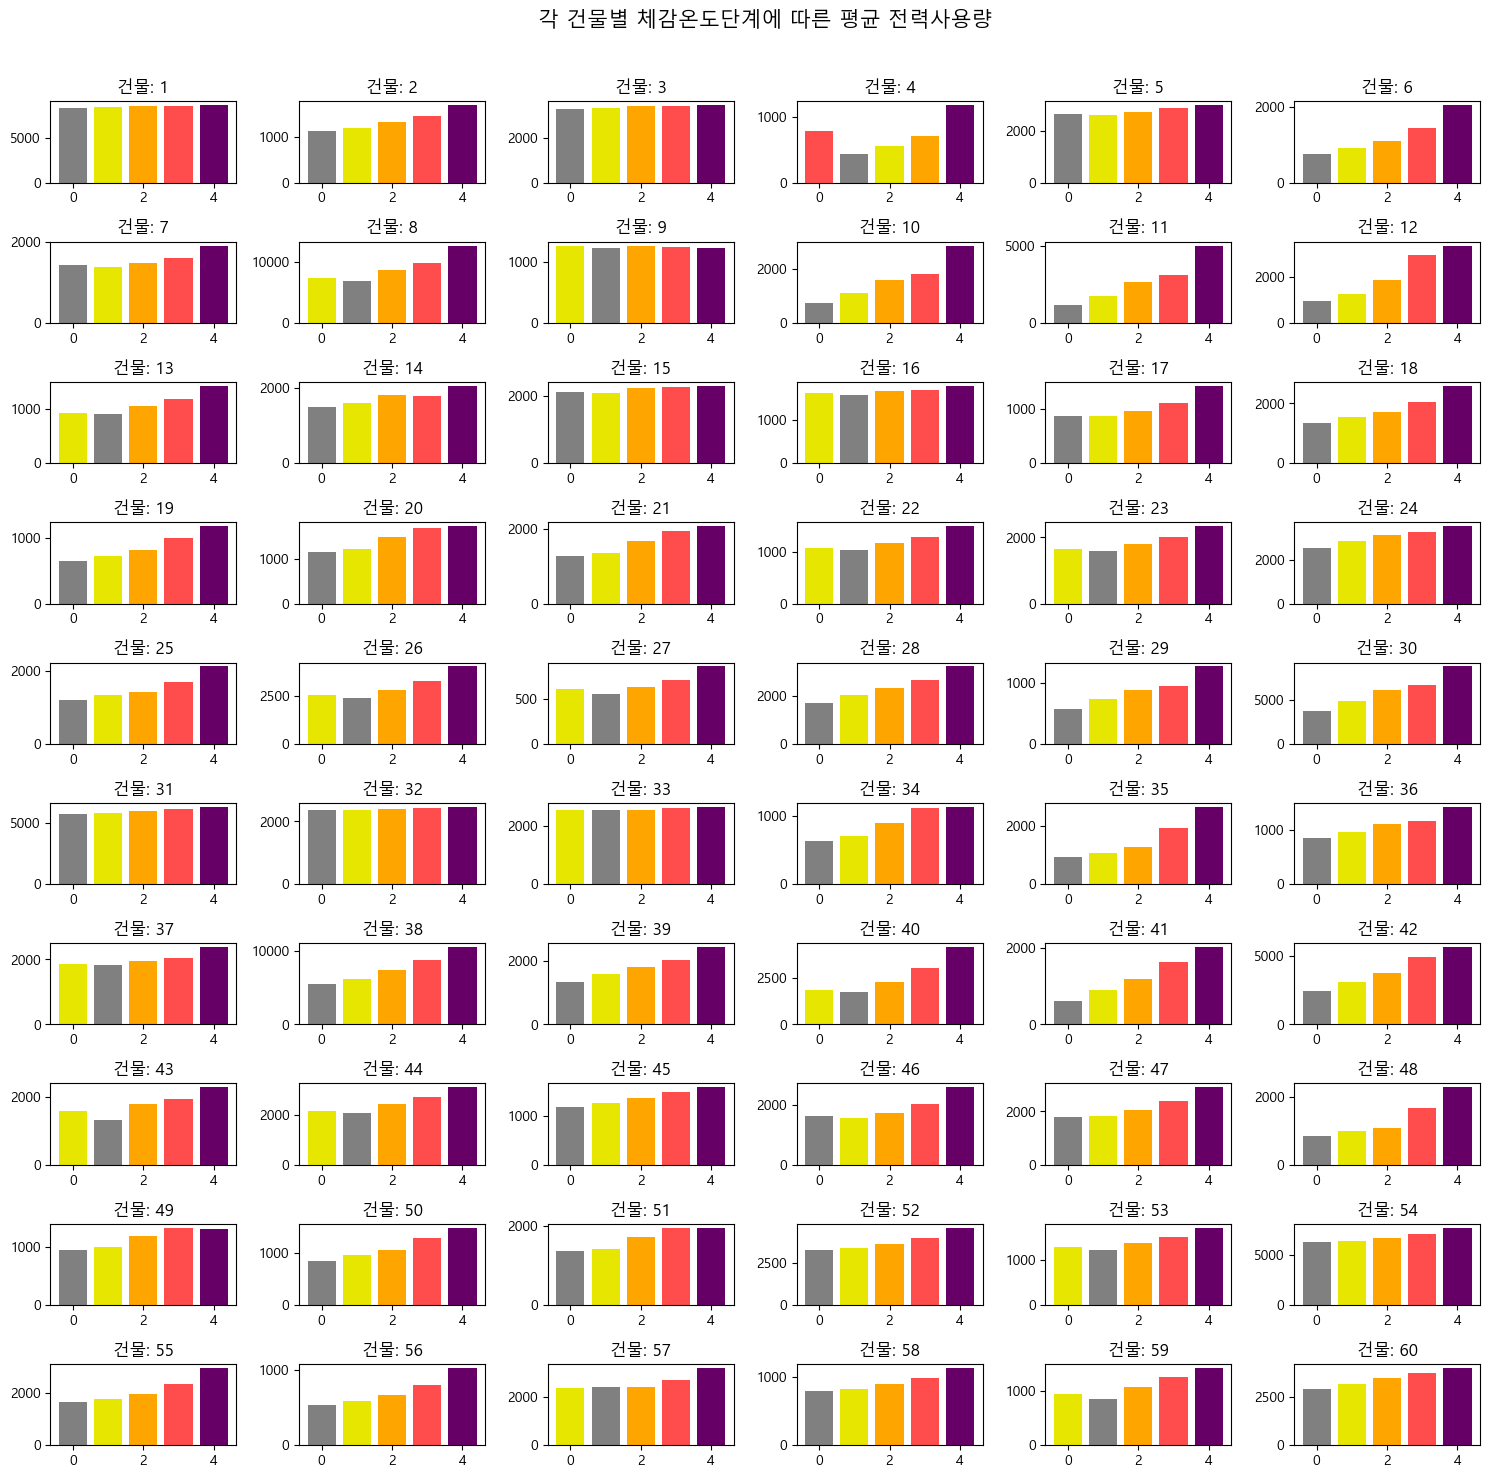

In [16]:
fig = plt.figure(figsize = (15 ,15))
matplotlib.rc('font', family="Malgun Gothic")
plt.title("각 건물별 체감온도단계에 따른 평균 전력사용량", fontsize=15, y=1.05)
plt.axis('off')

sensible_temp = data['체감온도단계'].unique()

for num in range(1,61):
    df = data[data.num==num]
    df_counts = df.groupby('체감온도단계')['전력사용량(kWh)'].mean()
    df_counts = df_counts.reindex(sensible_temp)
    ax = fig.add_subplot(10,6,num)
    ax.bar(df['체감온도단계'].unique(), df_counts, color=colors)
    ax.set_title(f'건물: {num}')

plt.tight_layout()
plt.show()

In [17]:
data[data["태양광보유"]==1]

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,체감온도,불쾌지수,불쾌도,체감온도단계
4080,3,2020-06-01 00:00:00,3183.624,17.0,2.0,100.0,1.1,0.0,1,1,18.513019,62.60000,0.0,0.0
4081,3,2020-06-01 01:00:00,3171.636,17.2,2.3,99.0,0.1,0.0,1,1,18.610954,62.93272,0.0,0.0
4082,3,2020-06-01 02:00:00,3175.740,17.2,3.7,98.0,0.0,0.0,1,1,18.200060,62.90544,0.0,0.0
4083,3,2020-06-01 03:00:00,3194.856,16.7,3.1,99.0,0.0,0.0,1,1,17.808297,62.03767,0.0,0.0
4084,3,2020-06-01 04:00:00,3198.528,16.9,3.5,98.0,0.0,0.0,1,1,17.917916,62.37138,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.368,27.8,2.3,68.0,0.0,0.7,1,1,30.000891,77.80896,4.0,3.0
122396,60,2020-08-24 20:00:00,3975.696,27.3,1.2,71.0,0.0,0.0,1,1,29.525251,77.44917,4.0,3.0
122397,60,2020-08-24 21:00:00,3572.208,27.3,1.8,71.0,0.0,0.0,1,1,29.487603,77.44917,4.0,3.0
122398,60,2020-08-24 22:00:00,3299.184,27.1,1.8,74.0,0.0,0.0,1,1,29.276183,77.52246,4.0,3.0


태양광보유
0    2093.135722
1    2572.504986
Name: 전력사용량(kWh), dtype: float64


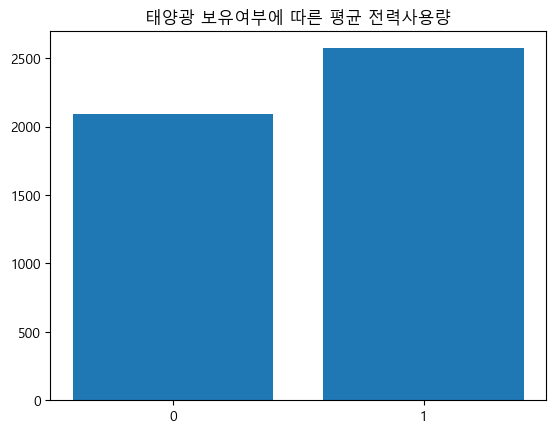

In [18]:
print(data.groupby('태양광보유')['전력사용량(kWh)'].mean())
matplotlib.rc('font', family="Malgun Gothic")
plt.title("태양광 보유여부에 따른 평균 전력사용량")
plt.bar([0,1],data.groupby('태양광보유')['전력사용량(kWh)'].mean())
plt.xticks([0,1])
plt.show()

C:\Users\gibeom2\AppData\Local\Temp\ipykernel_21996\1691750925.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  site['전력사용량(kWh)'] = site['전력사용량(kWh)']/site['전력사용량(kWh)'].max()
C:\Users\gibeom2\AppData\Local\Temp\ipykernel_21996\1691750925.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  site['전력사용량(kWh)'] = site['전력사용량(kWh)']/site['전력사용량(kWh)'].max()
C:\Users\gibeom2\AppData\Local\Temp\ipykernel_21996\1691750925.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

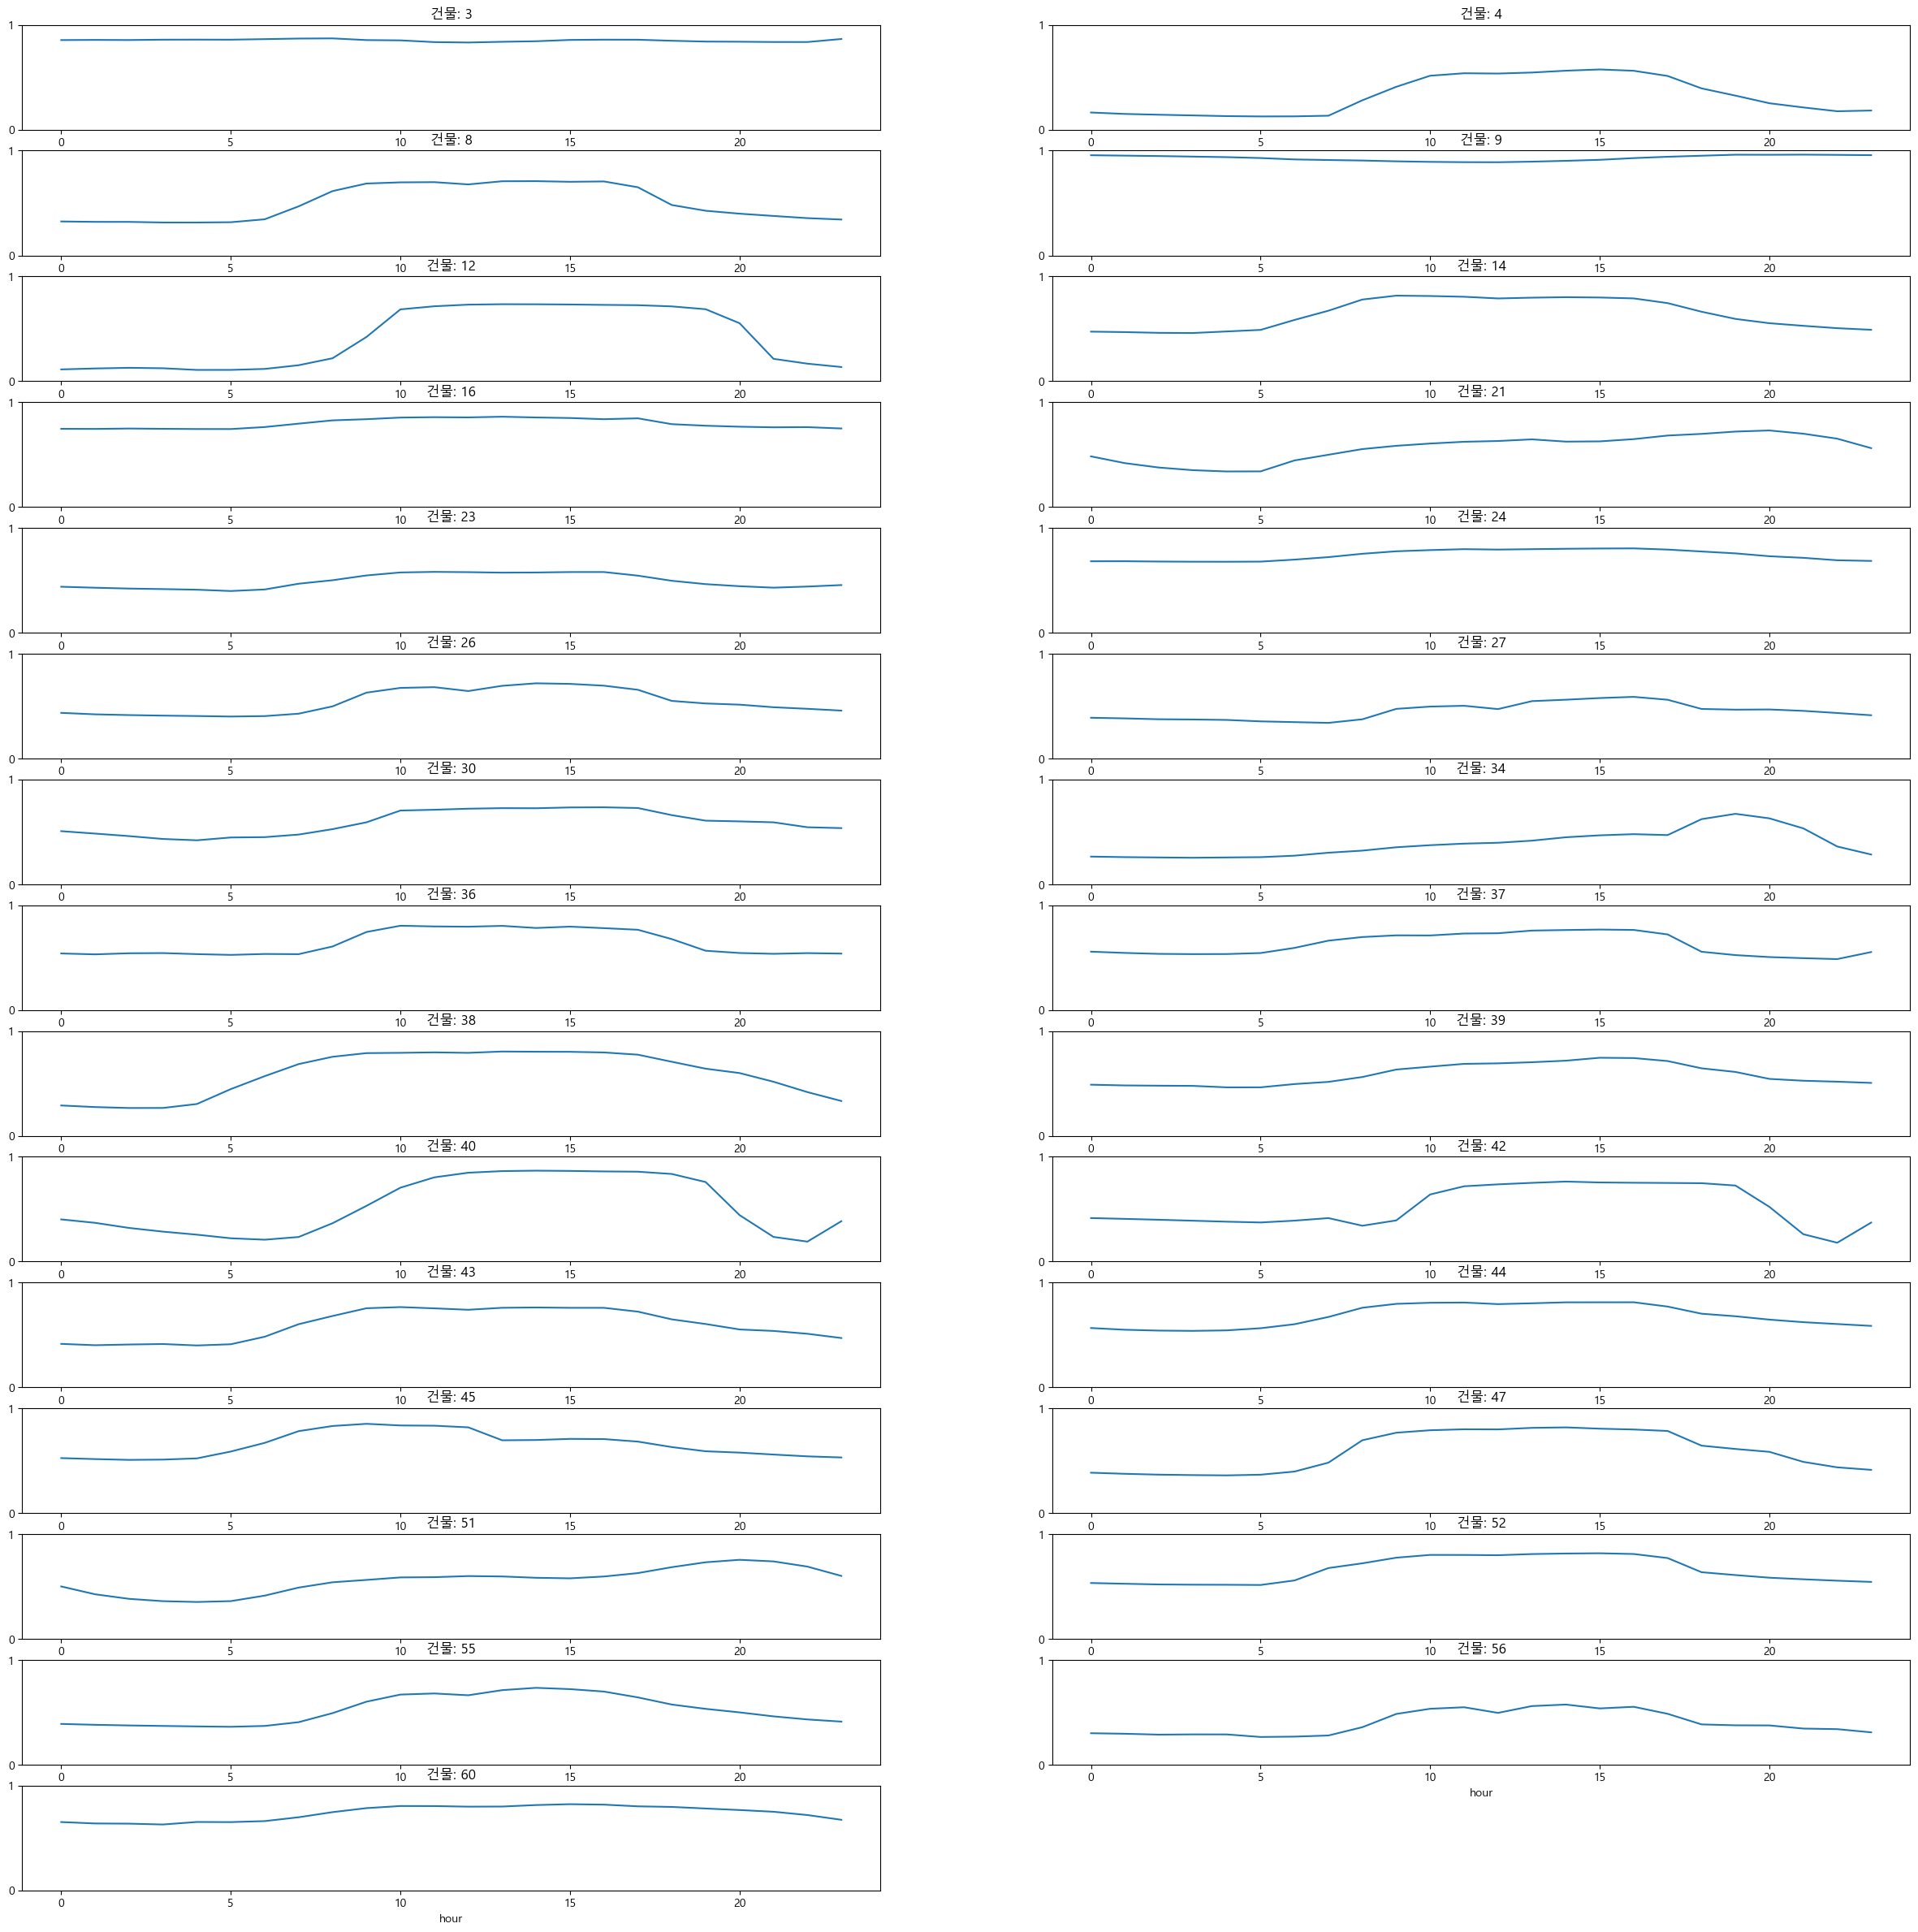

In [19]:
data['hour'] = data['date_time'].dt.hour
temp=1
fig = plt.figure(figsize = (30 ,60))
for idx in data[data["태양광보유"]==1]['num'].unique():
    plt.subplot(30,2,temp)
    temp_df=data[data["태양광보유"]==1]
    site = temp_df[temp_df['num'] == idx]
    site['전력사용량(kWh)'] = site['전력사용량(kWh)']/site['전력사용량(kWh)'].max()
    grp_site = site.groupby('hour')['전력사용량(kWh)'].mean()
    grp_site.plot()
    plt.yticks([0,1])
    plt.title(f'건물: {idx}')
    temp+=1

plt.show()

C:\Users\gibeom2\AppData\Local\Temp\ipykernel_21996\646597058.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  site['전력사용량(kWh)'] = site['전력사용량(kWh)']/site['전력사용량(kWh)'].max()
C:\Users\gibeom2\AppData\Local\Temp\ipykernel_21996\646597058.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  site['전력사용량(kWh)'] = site['전력사용량(kWh)']/site['전력사용량(kWh)'].max()
C:\Users\gibeom2\AppData\Local\Temp\ipykernel_21996\646597058.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

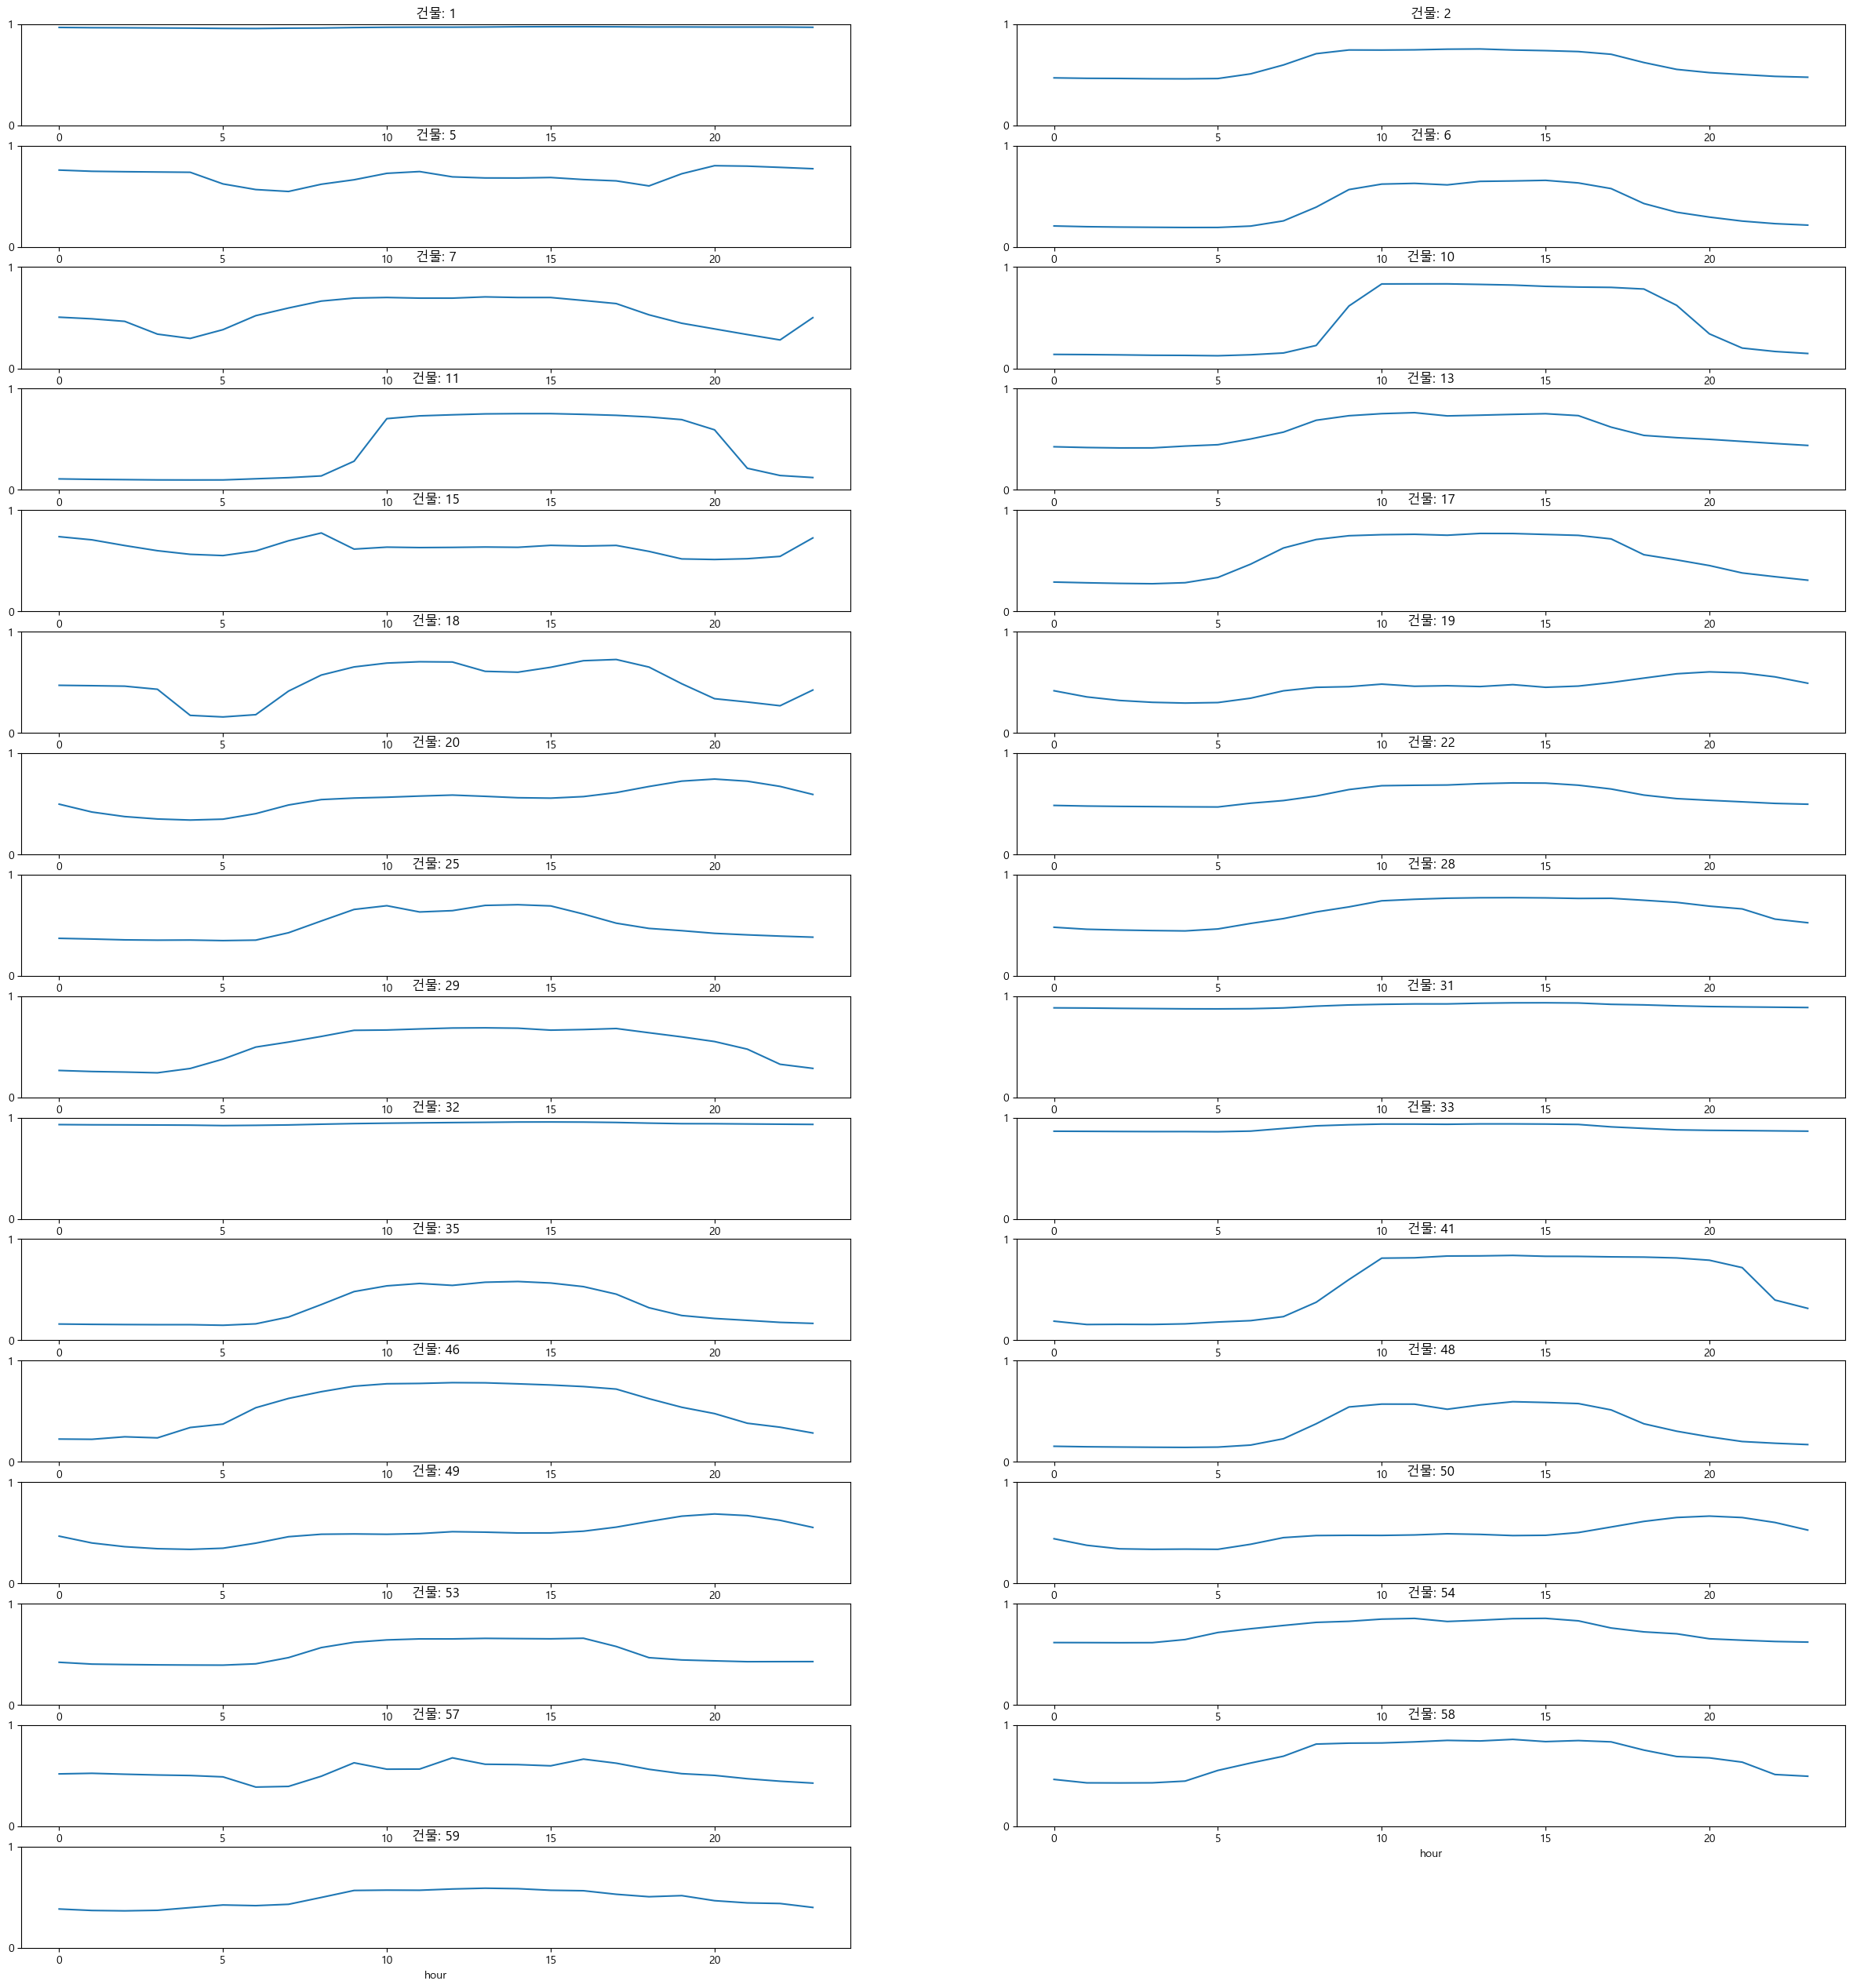

In [20]:
temp=1
fig = plt.figure(figsize = (30 ,60))
for idx in data[data["태양광보유"]==0]['num'].unique():
    plt.subplot(30,2,temp)
    temp_df=data[data["태양광보유"]==0]
    site = temp_df[temp_df['num'] == idx]
    site['전력사용량(kWh)'] = site['전력사용량(kWh)']/site['전력사용량(kWh)'].max()
    grp_site = site.groupby('hour')['전력사용량(kWh)'].mean()
    grp_site.plot()
    plt.yticks([0,1])
    plt.title(f'건물: {idx}')
    temp+=1

plt.show()

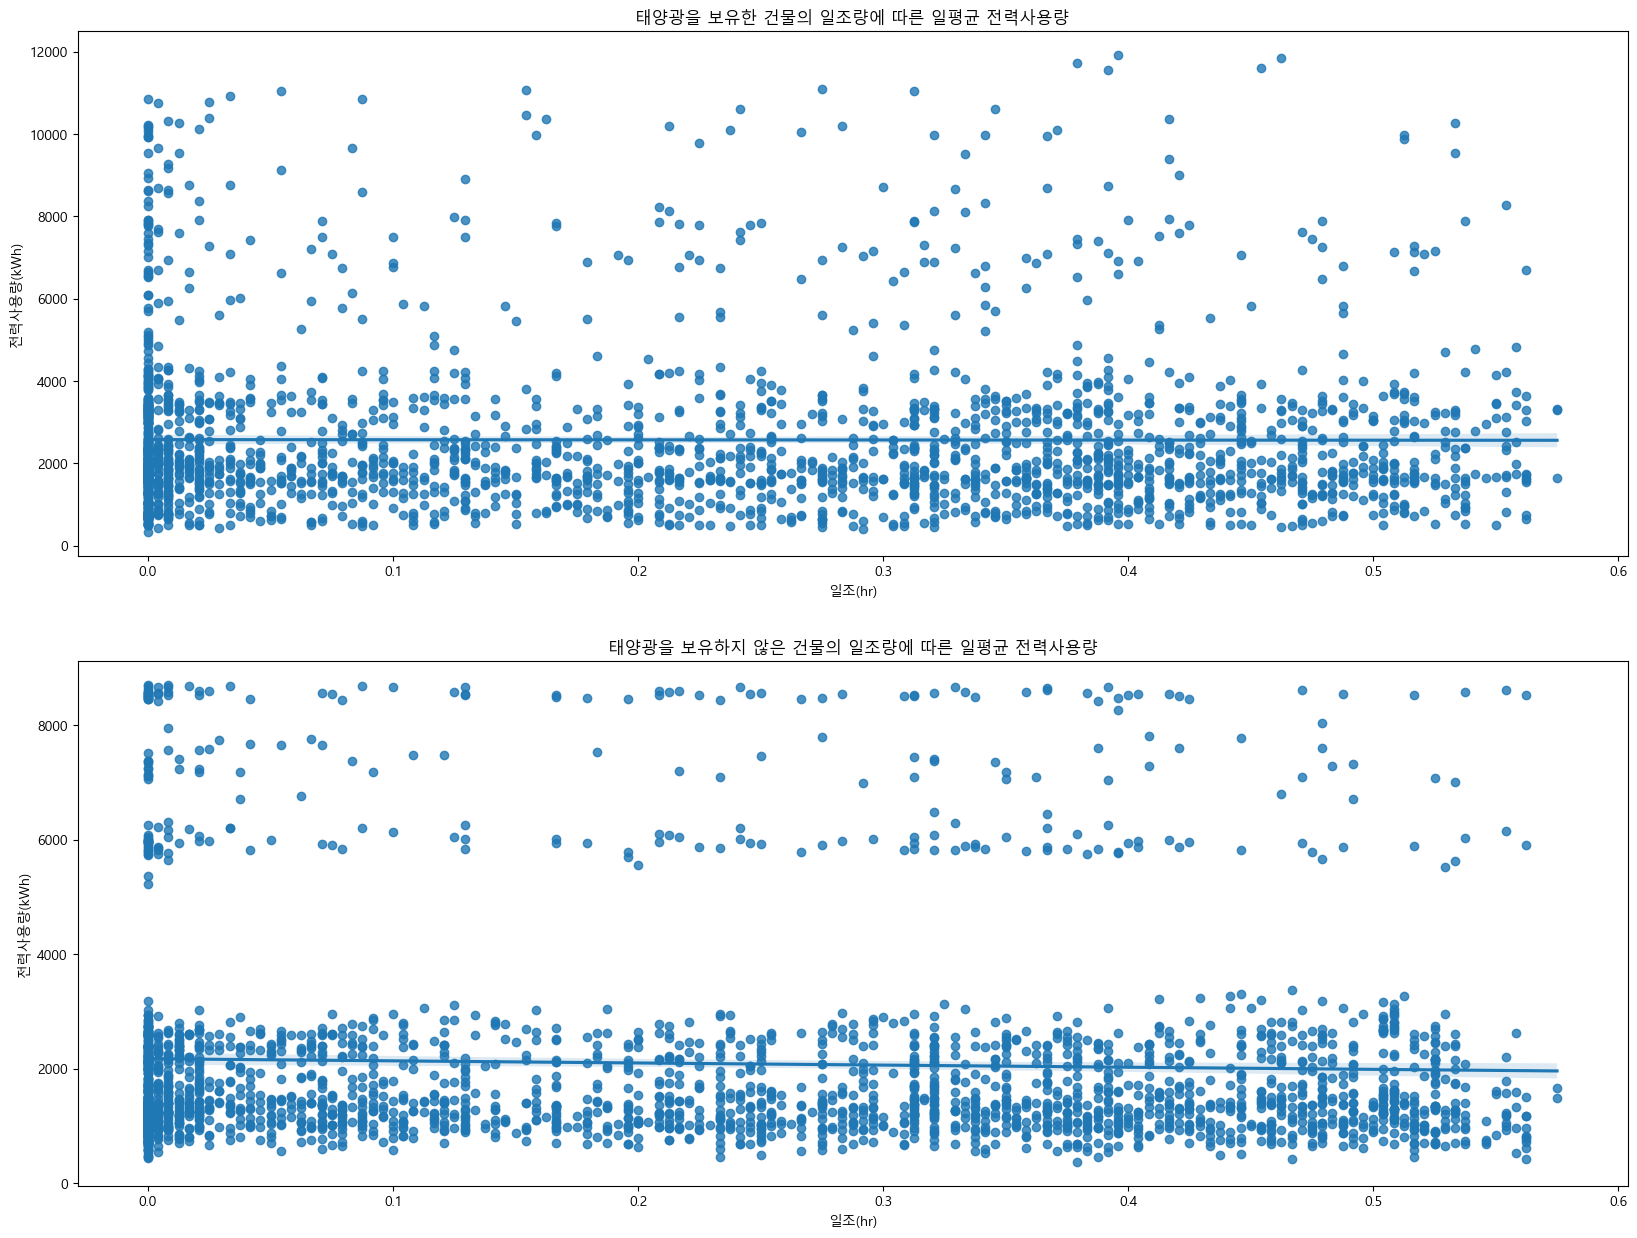

In [21]:
data['dayofyear'] = data.date_time.dt.dayofyear 

solar_temp = data.groupby(['num', 'dayofyear'])[['전력사용량(kWh)', '일조(hr)', '태양광보유']].mean().reset_index()

fig = plt.figure(figsize=(20, 15))
plt.subplot(2, 1, 1)
plt.title("태양광을 보유한 건물의 일조량에 따른 일평균 전력사용량")
sns.regplot(data=solar_temp.loc[solar_temp["태양광보유"] != 0], x='일조(hr)', y='전력사용량(kWh)')

plt.subplot(2, 1, 2)
plt.title("태양광을 보유하지 않은 건물의 일조량에 따른 일평균 전력사용량")
sns.regplot(data=solar_temp.loc[solar_temp["태양광보유"] == 0], x='일조(hr)', y='전력사용량(kWh)')

plt.show()

C:\Users\gibeom2\AppData\Local\Temp\ipykernel_21996\3055794844.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)


<AxesSubplot: xlabel='일조(hr)', ylabel='전력사용량(kWh)'>

C:\Users\gibeom2\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\gibeom2\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


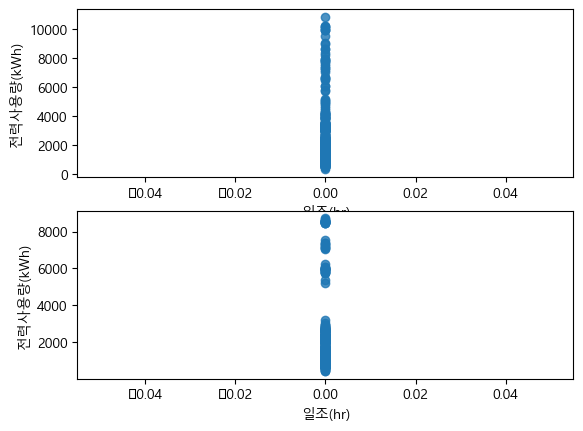

In [22]:
plt.title("태양광을 보유한 건물의 일조량에 따른 일평균 전력사용량")
plt.subplot(2, 1, 1)
sns.regplot(data=solar_temp.loc[(solar_temp["태양광보유"] != 0) & (solar_temp["일조(hr)"] == 0)], x='일조(hr)', y='전력사용량(kWh)')
plt.subplot(2, 1, 2)
sns.regplot(data=solar_temp.loc[(solar_temp["태양광보유"] == 0) & (solar_temp["일조(hr)"] == 0)], x='일조(hr)', y='전력사용량(kWh)')

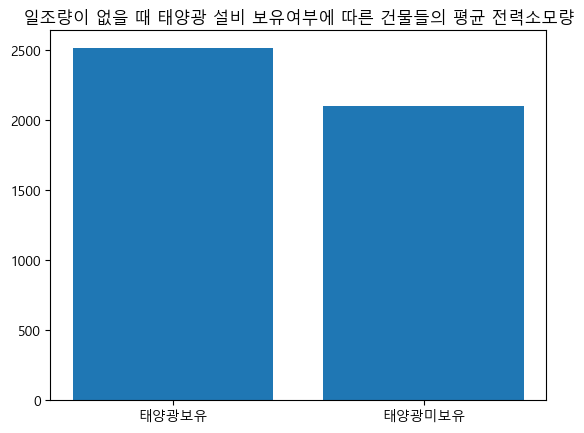

In [23]:
plt.title("일조량이 없을 때 태양광 설비 보유여부에 따른 건물들의 평균 전력소모량")
plt.bar(["태양광보유","태양광미보유"],[solar_temp[(solar_temp["태양광보유"] != 0) & (solar_temp["일조(hr)"] == 0)]["전력사용량(kWh)"].mean(),solar_temp[(solar_temp["태양광보유"] == 0) & (solar_temp["일조(hr)"] == 0)]["전력사용량(kWh)"].mean()])
plt.show()


In [57]:
grouped_data=data.groupby("date_time")['일조(hr)','전력사용량(kWh)'].mean()
grouped_data=grouped_data[grouped_data.index<="2020-06-30 23:00:00"]
grouped_data

C:\Users\gibeom2\AppData\Local\Temp\ipykernel_21996\3698997166.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_data=data.groupby("date_time")['일조(hr)','전력사용량(kWh)'].mean()


,일조(hr),전력사용량(kWh)
date_time,,
2020-06-01 00:00:00,0.000000,1665.076950
2020-06-01 01:00:00,0.000000,1630.213888
2020-06-01 02:00:00,0.000000,1594.097142
2020-06-01 03:00:00,0.000000,1544.555640
2020-06-01 04:00:00,0.000000,1536.407105
...,...,...
2020-06-30 19:00:00,0.133333,2298.255000
2020-06-30 20:00:00,0.000000,2152.289150
2020-06-30 21:00:00,0.000000,1984.103400


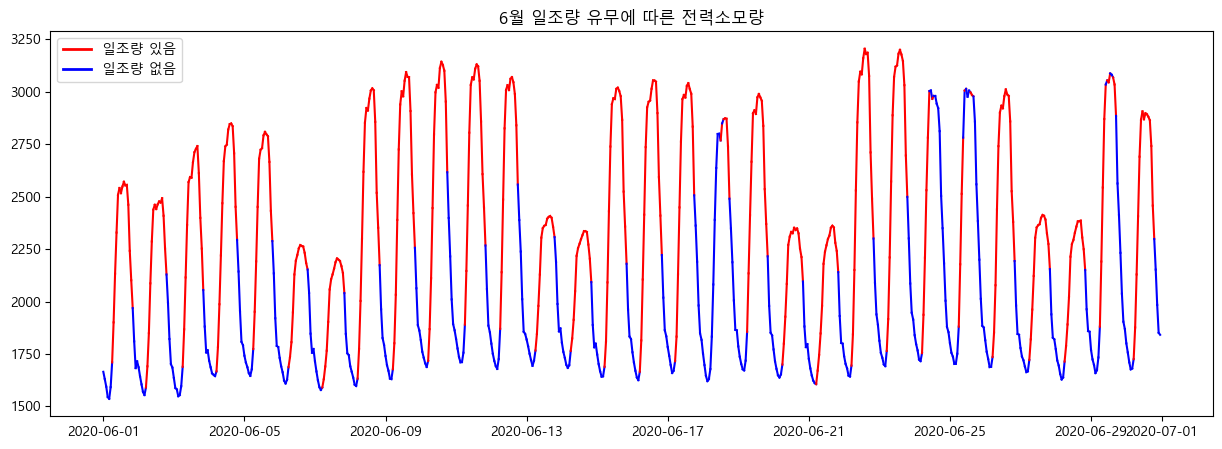

In [25]:
colors = ['blue' if grouped_data.iloc[x,0]==0 else 'red' for x in range(len(grouped_data))]
fig = plt.figure(figsize=(15, 5))
plt.title("6월 일조량 유무에 따른 전력소모량")
for i in range(1, len(colors)):
    plt.plot(grouped_data.index[i-1:i+1],grouped_data.values[i-1:i+1,1], color=colors[i])

legend_elements = [Line2D([0], [0], color='red', lw=2, label='일조량 있음'),
                   Line2D([0], [0], color='blue', lw=2, label='일조량 없음')]

plt.legend(handles=legend_elements)
plt.show()

In [26]:
data.iloc

In [27]:
fig = plt.figure(figsize = (15 ,15))
matplotlib.rc('font', family="Malgun Gothic")
plt.title("각 건물별 6월 일조량 유무에 따른 전력소모량", fontsize=15, y=1.05)
plt.axis('off')

for num in range(1,2):
    df = grouped_data[grouped_data.num==num]
    
    colors = ['blue' if df.iloc[x,7]==0 else 'red' for x in range(len(df))]
    for i in range(1, len(colors)):
        plt.plot(df.iloc[i-1:i+1,1],df.iloc[i-1:i+1,7].values, color=colors[i])
        legend_elements = [Line2D([0], [0], color='red', lw=2, label='일조량 있음'),
                        Line2D([0], [0], color='blue', lw=2, label='일조량 없음')]
        plt.legend(handles=legend_elements)
        ax = fig.add_subplot(10,6,num)
        ax.set_title(f'건물: {num}')

plt.tight_layout()
plt.show()

C:\Users\gibeom2\AppData\Local\Temp\ipykernel_21484\2404434286.py:18: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()


KeyboardInterrupt: 

C:\Users\gibeom2\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)


비전기냉방설비운영
0    1868.722163
1    2536.198313
Name: 전력사용량(kWh), dtype: float64


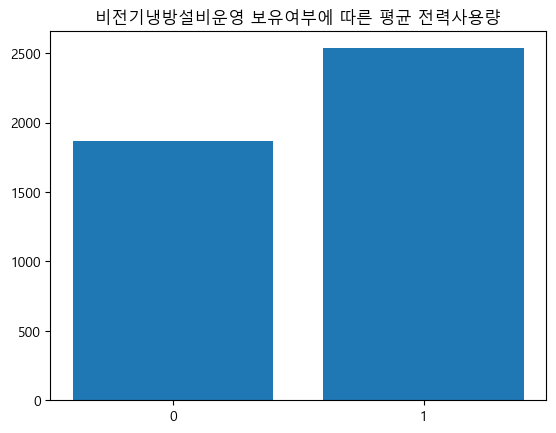

In [70]:
print(data.groupby('비전기냉방설비운영')['전력사용량(kWh)'].mean())
matplotlib.rc('font', family="Malgun Gothic")
plt.title("비전기냉방설비운영 보유여부에 따른 평균 전력사용량")
plt.bar([0,1],data.groupby('비전기냉방설비운영')['전력사용량(kWh)'].mean())
plt.xticks([0,1])
plt.show()

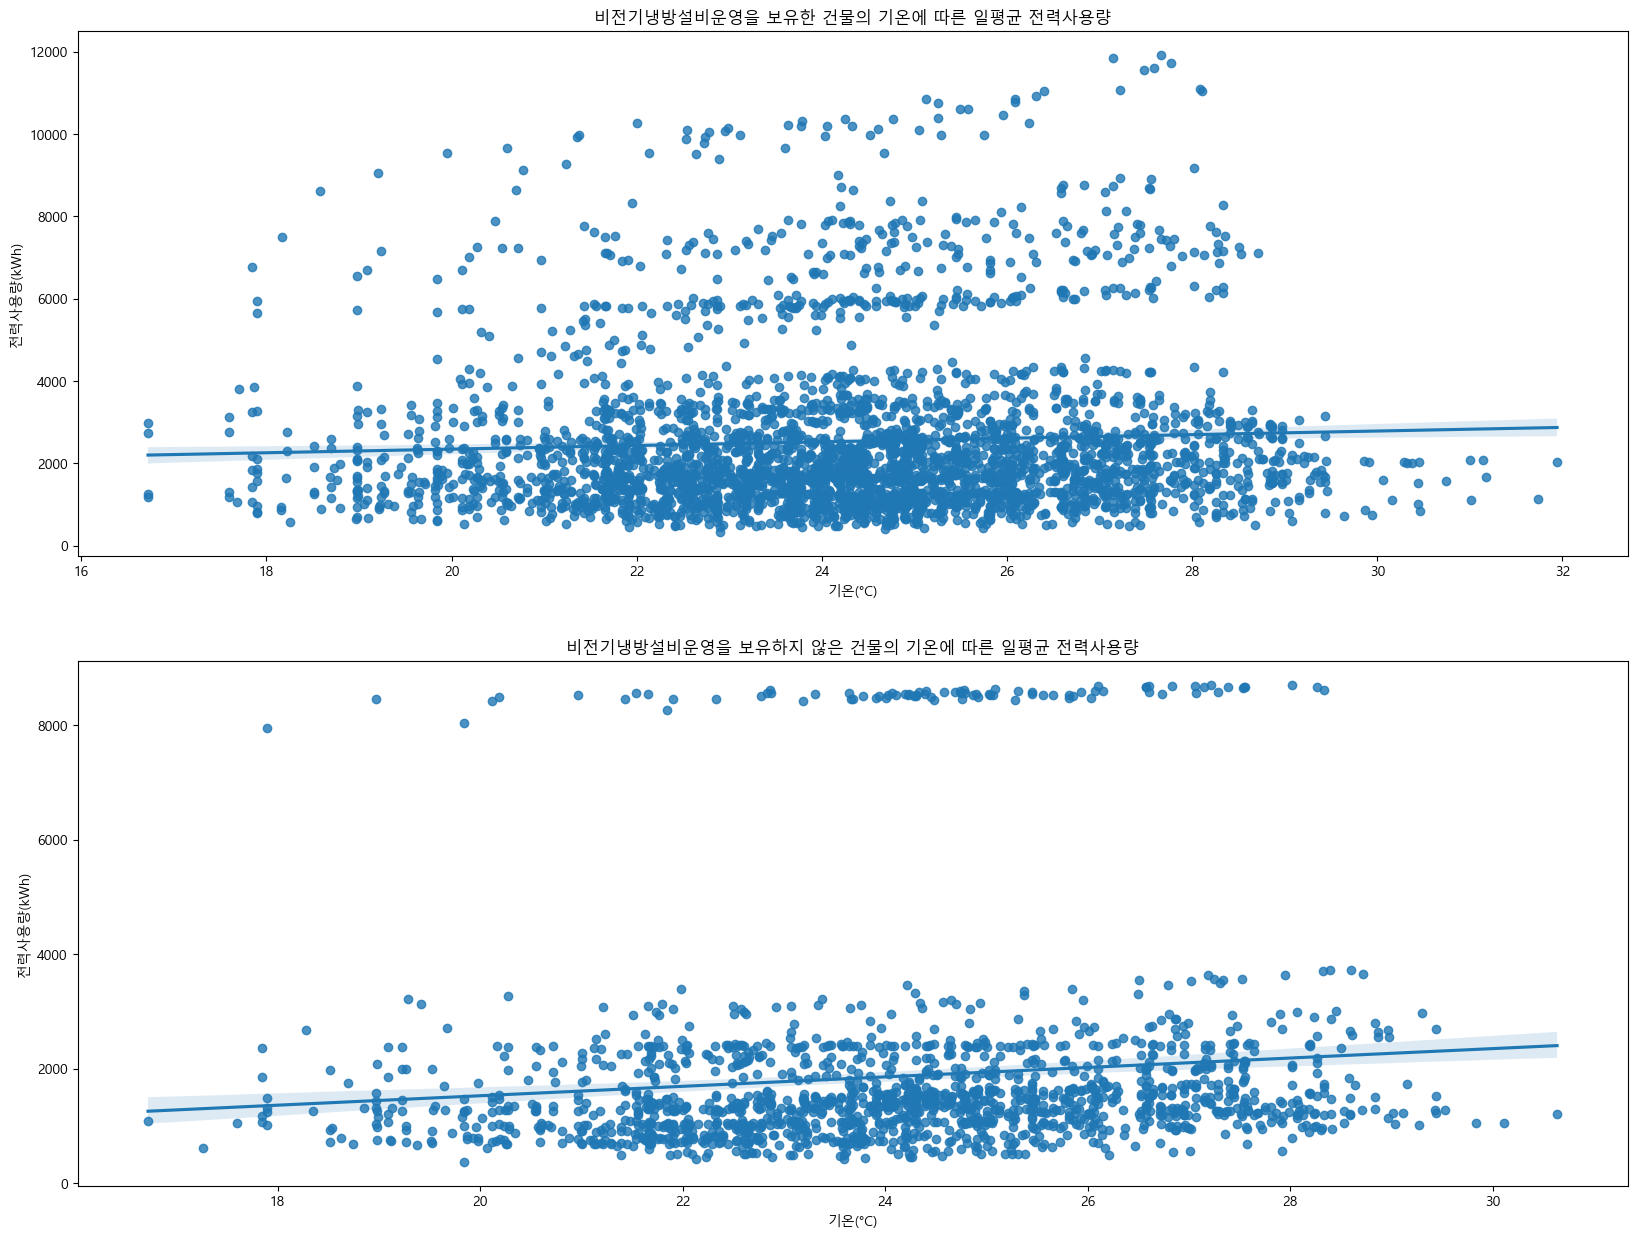

In [71]:
cooler_temp = data.groupby(['num', 'dayofyear'])[['전력사용량(kWh)', '기온(°C)', '비전기냉방설비운영']].mean().reset_index()

fig = plt.figure(figsize=(20, 15))
plt.subplot(2, 1, 1)
plt.title("비전기냉방설비운영을 보유한 건물의 기온에 따른 일평균 전력사용량")
sns.regplot(data=cooler_temp.loc[cooler_temp["비전기냉방설비운영"] != 0], x='기온(°C)', y='전력사용량(kWh)')

plt.subplot(2, 1, 2)
plt.title("비전기냉방설비운영을 보유하지 않은 건물의 기온에 따른 일평균 전력사용량")
sns.regplot(data=cooler_temp.loc[cooler_temp["비전기냉방설비운영"] == 0], x='기온(°C)', y='전력사용량(kWh)')

plt.show()


장마기간

|월|일|
|---|---|
|6|10~14, 18, 24, 29~30|
|7|6~7, 10, 12~14, 19~20, 22~30|
|8|1~11, 15, 21~22, 26~31|
|9|1~3, 5~7, 11~13|

In [191]:
data_June=data[data["date_time"]<="2020-06-30 23:00:00"]
data_July=data[(data["date_time"]>"2020-06-30 23:00:00") & (data["date_time"]<="2020-07-31 23:00:00")]
data_Aug=data[(data["date_time"]>"2020-07-31") & (data["date_time"]<="2020-08-31 23:00:00")]

In [193]:
rainy_season_June=pd.concat([data[data["date_time"].between("2020-06-10","2020-06-14 23:00:00")],data[data["date_time"].between("2020-06-18","2020-06-18 23:00:00")],data[data["date_time"].between("2020-06-24","2020-06-24 23:00:00")],data[data["date_time"].between("2020-06-29","2020-06-30 23:00:00")]])
rainy_season_June

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,체감온도,불쾌지수,불쾌도,체감온도단계,hour,dayofyear
216,1,2020-06-10 00:00:00,8602.848,24.6,1.6,52.0,0.0,0.0,0,0,26.666582,71.45408,3.0,2.0,0,162
217,1,2020-06-10 01:00:00,8562.024,24.3,1.2,54.0,0.0,0.0,0,0,26.436041,71.25178,3.0,2.0,1,162
218,1,2020-06-10 02:00:00,8561.376,23.9,0.6,55.0,0.0,0.0,0,0,26.228816,70.80755,2.0,2.0,2,162
219,1,2020-06-10 03:00:00,8524.440,23.6,1.7,57.0,0.0,0.0,0,0,25.596466,70.58248,2.0,2.0,3,162
220,1,2020-06-10 04:00:00,8510.832,23.2,1.7,57.0,0.0,0.0,0,0,25.175213,70.03276,2.0,2.0,4,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121075,60,2020-06-30 19:00:00,3170.880,19.6,6.1,86.0,0.1,0.0,1,1,20.495371,66.56544,0.0,0.0,19,182
121076,60,2020-06-30 20:00:00,3179.952,18.5,4.9,93.0,0.1,0.0,1,1,19.414820,65.01895,0.0,0.0,20,182
121077,60,2020-06-30 21:00:00,3210.624,18.7,2.9,87.0,0.0,0.0,1,1,20.051977,65.11231,0.0,0.0,21,182
121078,60,2020-06-30 22:00:00,3060.288,18.7,1.9,94.0,0.0,0.0,1,1,20.358798,65.40722,0.0,0.0,22,182


In [194]:
rainy_season_July=pd.concat([data[data["date_time"].between("2020-07-06","2020-07-07 23:00:00")],data[data["date_time"].between("2020-07-10","2020-07-10 23:00:00")],data[data["date_time"].between("2020-07-12","2020-07-14 23:00:00")],data[data["date_time"].between("2020-07-19","2020-07-20 23:00:00")],data[data["date_time"].between("2020-07-22","2020-07-30 23:00:00")]])
rainy_season_July

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,체감온도,불쾌지수,불쾌도,체감온도단계,hour,dayofyear
840,1,2020-07-06 00:00:00,8494.632,23.0,1.2,70.0,0.0,0.0,0,0,25.097383,70.85900,2.0,2.0,0,188
841,1,2020-07-06 01:00:00,8483.616,22.8,1.7,72.0,0.0,0.0,0,0,24.753959,70.72384,2.0,1.0,1,188
842,1,2020-07-06 02:00:00,8471.952,22.7,2.1,72.0,0.0,0.0,0,0,24.559947,70.57156,2.0,1.0,2,188
843,1,2020-07-06 03:00:00,8459.640,22.6,1.1,72.0,0.0,0.0,0,0,24.719781,70.41928,2.0,1.0,3,188
844,1,2020-07-06 04:00:00,8453.160,22.4,1.1,73.0,0.0,0.0,0,0,24.514962,70.19348,2.0,1.0,4,188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121795,60,2020-07-30 19:00:00,3618.864,24.4,3.3,83.0,0.0,1.0,1,1,26.232330,74.24448,3.0,2.0,19,212
121796,60,2020-07-30 20:00:00,3533.328,23.5,1.6,89.0,0.0,0.6,1,1,25.512719,73.31385,2.0,2.0,20,212
121797,60,2020-07-30 21:00:00,3490.128,22.9,1.6,91.0,0.0,0.0,1,1,24.883338,72.46661,2.0,1.0,21,212
121798,60,2020-07-30 22:00:00,3349.728,22.5,1.2,92.0,0.0,0.0,1,1,24.582514,71.86200,2.0,1.0,22,212


In [197]:
rainy_season_Aug=pd.concat([data[data["date_time"].between("2020-08-01","2020-08-11 23:00:00")],data[data["date_time"].between("2020-08-15","2020-08-15 23:00:00")],data[data["date_time"].between("2020-08-21","2020-08-22 23:00:00")],data[data["date_time"].between("2020-08-26","2020-08-31 23:00:00")],data[data["date_time"].between("2020-07-22","2020-07-30 23:00:00")]])
rainy_season_Aug

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,체감온도,불쾌지수,불쾌도,체감온도단계,hour,dayofyear
1464,1,2020-08-01 00:00:00,8623.584,25.0,3.4,90.0,1.0,0.0,0,0,26.884759,75.95500,3.0,2.0,0,214
1465,1,2020-08-01 01:00:00,8591.184,24.6,0.5,90.0,0.2,0.0,0,0,26.962450,75.27460,3.0,2.0,1,214
1466,1,2020-08-01 02:00:00,8582.112,24.6,0.5,91.0,0.0,0.0,0,0,26.962450,75.37514,3.0,2.0,2,214
1467,1,2020-08-01 03:00:00,8593.776,24.7,1.2,93.0,0.0,0.0,0,0,26.847935,75.74929,3.0,2.0,3,214
1468,1,2020-08-01 04:00:00,8575.632,24.7,0.8,94.0,0.0,0.0,0,0,26.949891,75.85082,3.0,2.0,4,214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121795,60,2020-07-30 19:00:00,3618.864,24.4,3.3,83.0,0.0,1.0,1,1,26.232330,74.24448,3.0,2.0,19,212
121796,60,2020-07-30 20:00:00,3533.328,23.5,1.6,89.0,0.0,0.6,1,1,25.512719,73.31385,2.0,2.0,20,212
121797,60,2020-07-30 21:00:00,3490.128,22.9,1.6,91.0,0.0,0.0,1,1,24.883338,72.46661,2.0,1.0,21,212
121798,60,2020-07-30 22:00:00,3349.728,22.5,1.2,92.0,0.0,0.0,1,1,24.582514,71.86200,2.0,1.0,22,212


In [195]:
grouped_data=data.groupby("date_time")['전력사용량(kWh)'].mean()
filtered_data=grouped_data[grouped_data.index<="2020-06-30 23:00:00"]

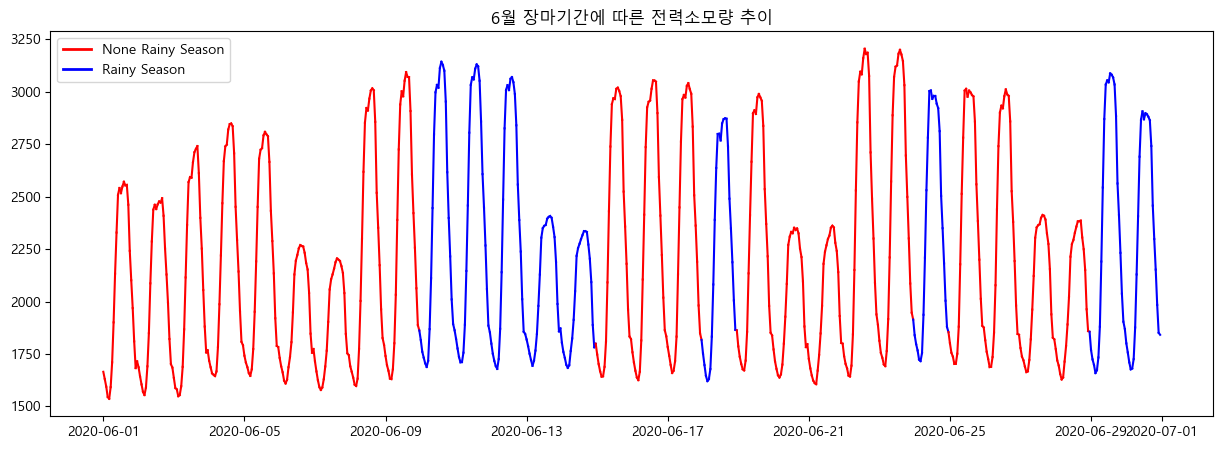

In [196]:
colors = ['blue' if x in rainy_season_June['date_time'].values else 'red' for x in data_June['date_time']]
fig = plt.figure(figsize=(15, 5))
plt.title("6월 장마기간에 따른 전력소모량 추이")
for i in range(1, len(colors)):
    plt.plot(filtered_data.index[i-1:i+1],filtered_data.values[i-1:i+1], color=colors[i])

legend_elements = [Line2D([0], [0], color='red', lw=2, label='None Rainy Season'),
                   Line2D([0], [0], color='blue', lw=2, label='Rainy Season')]

plt.legend(handles=legend_elements)
plt.show()

In [199]:
grouped_data=data.groupby("date_time")['전력사용량(kWh)'].mean()
filtered_data=grouped_data[(grouped_data.index<="2020-07-31 23:00:00") & (grouped_data.index>"2020-06-30 23:00:00")]


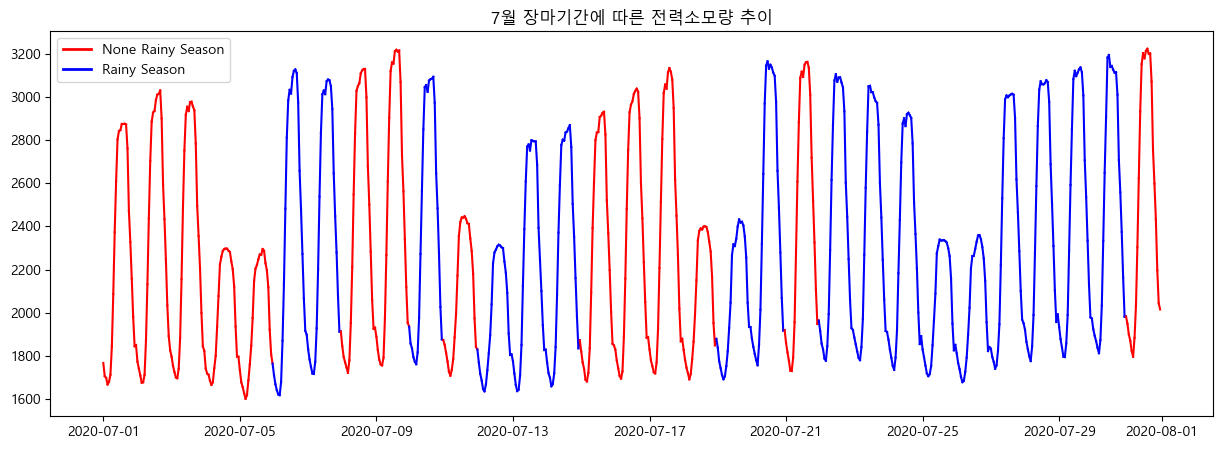

In [200]:
colors = ['blue' if x in rainy_season_July['date_time'].values else 'red' for x in data_July['date_time']]
fig = plt.figure(figsize=(15, 5))
plt.title("7월 장마기간에 따른 전력소모량 추이")
for i in range(1, len(colors)):
    plt.plot(filtered_data.index[i-1:i+1],filtered_data.values[i-1:i+1], color=colors[i])

legend_elements = [Line2D([0], [0], color='red', lw=2, label='None Rainy Season'),
                   Line2D([0], [0], color='blue', lw=2, label='Rainy Season')]

plt.legend(handles=legend_elements)
plt.show()

In [201]:
grouped_data=data.groupby("date_time")['전력사용량(kWh)'].mean()
filtered_data=grouped_data[(grouped_data.index<="2020-08-31 23:00:00") & (grouped_data.index>"2020-07-31 23:00:00")]


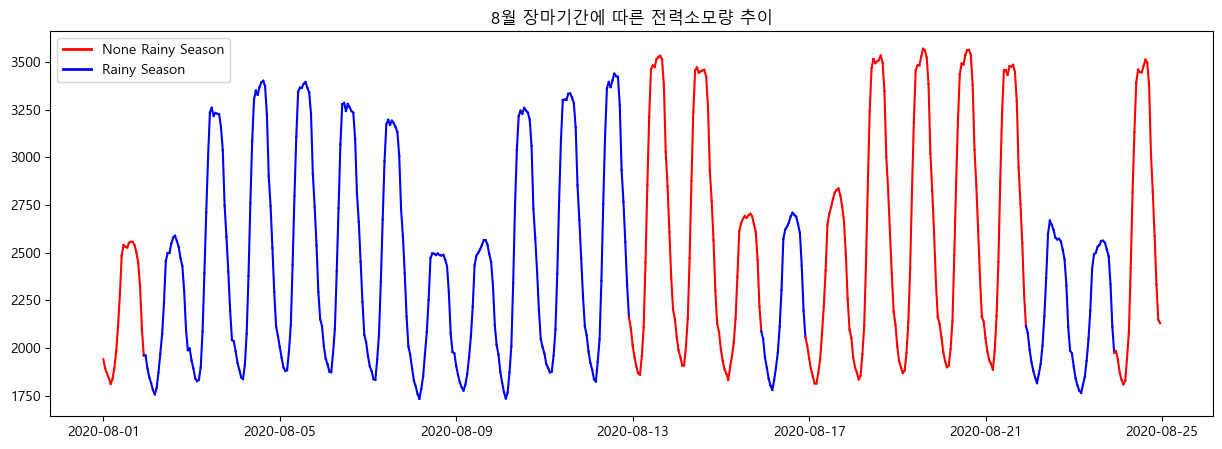

In [202]:
colors = ['blue' if x in rainy_season_Aug['date_time'].values else 'red' for x in data_Aug['date_time']]
fig = plt.figure(figsize=(15, 5))
plt.title("8월 장마기간에 따른 전력소모량 추이")
for i in range(1, len(colors)):
    plt.plot(filtered_data.index[i-1:i+1],filtered_data.values[i-1:i+1], color=colors[i])

legend_elements = [Line2D([0], [0], color='red', lw=2, label='None Rainy Season'),
                   Line2D([0], [0], color='blue', lw=2, label='Rainy Season')]

plt.legend(handles=legend_elements)
plt.show()